# 4. Random number generator for

---

arbitrary PDFs

---


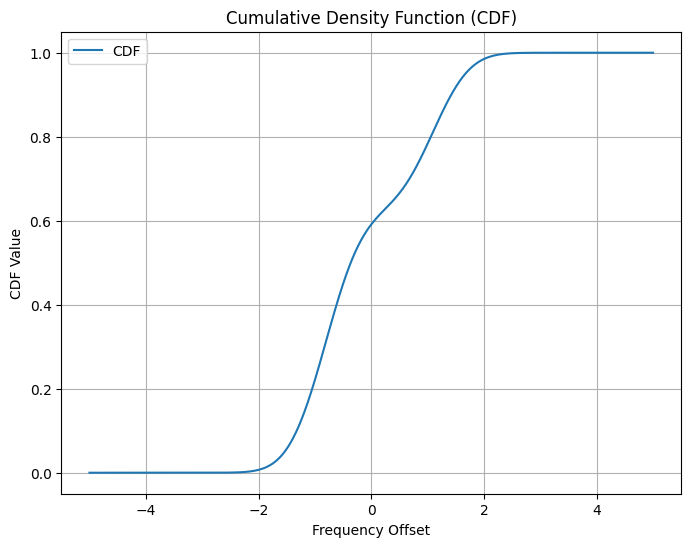

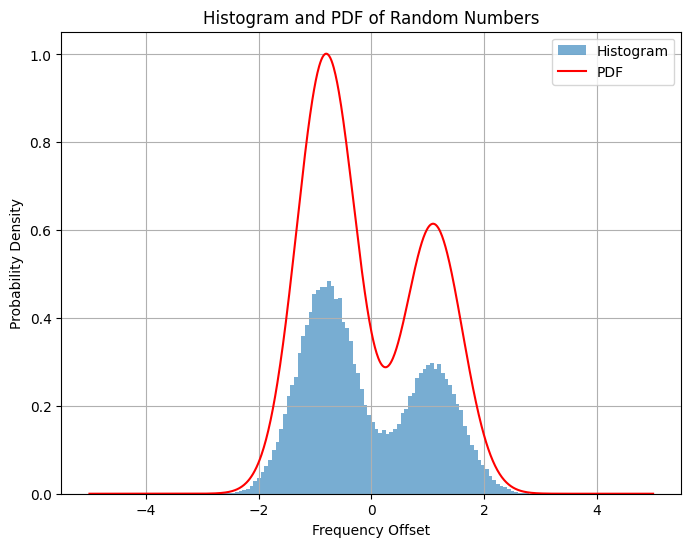

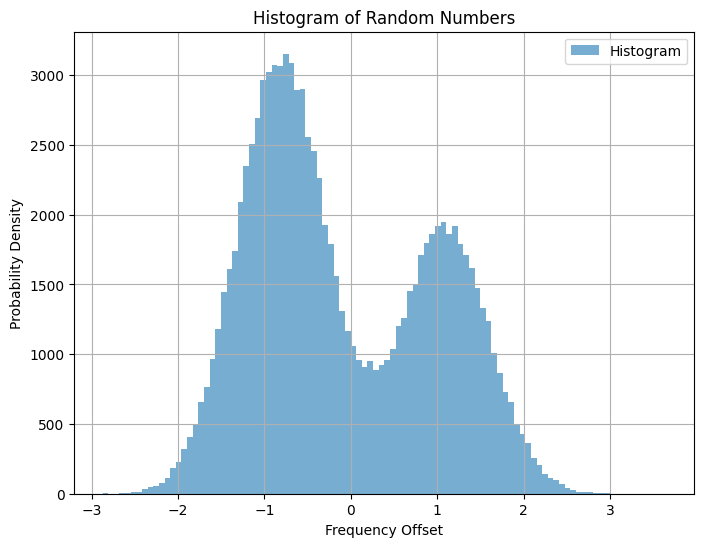

In [6]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

# Updated fitted parameters for two 1D Gaussians
A1 = 1.0011139082688358
mu1 = -0.8006697074192017
sigma1 = 0.5212199884513367
A2 = 0.61343962318129
mu2 = 1.1006565375009572
sigma2 = 0.5148002807621213

# Function for the sum of two 1D Gaussians with updated parameters
def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    gaussian1 = A1 * np.exp(-(x - mu1) ** 2 / (2 * sigma1 ** 2))
    gaussian2 = A2 * np.exp(-(x - mu2) ** 2 / (2 * sigma2 ** 2))
    return gaussian1 + gaussian2

# Question 4(a): Compute the CDF from the PDF and normalize it
x_values = np.linspace(-5, 5, 1000)  # Adjust the range of frequency offset values as needed
pdf_values = double_gaussian(x_values, A1, mu1, sigma1, A2, mu2, sigma2)  # PDF of the fitted Gaussians
cdf_values = np.cumsum(pdf_values)
cdf_values /= cdf_values[-1]  # Normalize CDF

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(x_values, cdf_values, label="CDF")
plt.xlabel("Frequency Offset")
plt.ylabel("CDF Value")
plt.title("Cumulative Density Function (CDF)")
plt.legend()
plt.grid(True)
plt.show()

# Question 4(b): Code for random number generation based on the CDF
def random_number_generator_with_cdf(cdf, x_values, num_samples):
    rand_uniform = np.random.rand(num_samples)
    rand_numbers = np.interp(rand_uniform, cdf, x_values)
    return rand_numbers

# Question 4(c): Generate 100,000 random numbers
num_samples = 100000
random_numbers = random_number_generator_with_cdf(cdf_values, x_values, num_samples)

# Plot histogram and PDF together
plt.figure(figsize=(8, 6))

plt.hist(random_numbers, bins=100, density=True, alpha=0.6, label="Histogram")
plt.plot(x_values, pdf_values, 'r', label="PDF")
plt.xlabel("Frequency Offset")
plt.ylabel("Probability Density")
plt.title("Histogram and PDF of Random Numbers")
plt.legend()
plt.grid(True)

plt.show()

# Plot histogram
plt.figure(figsize=(8, 6))

plt.hist(random_numbers, bins=100, density=False, alpha=0.6, label="Histogram")
plt.xlabel("Frequency Offset")
plt.ylabel("Probability Density")
plt.title("Histogram of Random Numbers")
plt.legend()
plt.grid(True)

plt.show()

# Explaination

**Cumulative Density Function (CDF) and PDF Plot:**
   - The code calculates and visualizes both the Cumulative Density Function (CDF) and the Probability Density Function (PDF) for a double Gaussian distribution.
   - The CDF plot displays the CDF values on the y-axis and frequency offset values on the x-axis.
     - The CDF represents how the cumulative probability increases as we move along the frequency offset axis.
     - It starts at 0 and reaches 1, showing the accumulation of probability.
   - The PDF plot, represented by the red curve, showcases the Probability Density Function for the double Gaussian distribution.
     - The PDF describes the probability density at each frequency offset value.
     - It demonstrates how likely different frequency offsets are according to the double Gaussian distribution.
   - Both plots together provide a comprehensive view of the distribution's characteristics and cumulative behavior.

**Random Number Generation and Histogram:**
   - Using the computed CDF, the code generates 100,000 random numbers that follow the double Gaussian distribution.
   - These random numbers are sampled according to the probability model described by the CDF.
   - The code then creates a histogram to visualize the distribution of these generated random numbers.
     - The histogram displays the frequency of occurrence of different frequency offset values.
     - It approximates the shape of the PDF and reflects how the random numbers are distributed.
   - The histogram is superimposed on the PDF plot for comparison, allowing viewers to see how closely the generated random numbers match the PDF.
